In [2]:
print('logistic')
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

logistic


In [3]:
torch.manual_seed(2017)

In [4]:
with open('./data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]

40
3


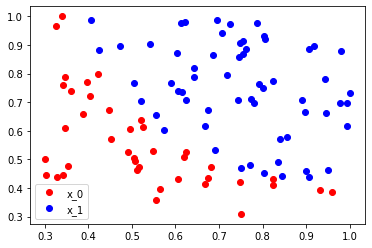

In [5]:
# norm
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]
x0 = list(filter(lambda x:x[-1]==0.0, data))
x1 = list(filter(lambda x:x[-1]==1.0, data))
plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')
print(len(x0))
print(len(x0[0]))

In [6]:
# data to numpy
np_data = np.array(data, dtype='float32')
x_data = torch.from_numpy(np_data[:,0:2])
y_data = torch.from_numpy(np_data[:,-1]).unsqueeze(1)
print(x_data.shape)
print(y_data.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


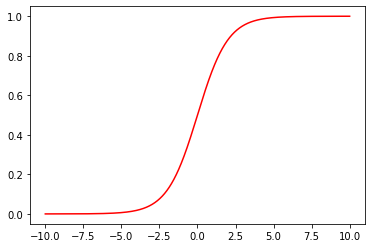

In [8]:
plot_x = np.arange(-10, 10.01, 0.01)
plot_y = sigmoid(plot_x)
plt.plot(plot_x, plot_y, 'r')

In [9]:
x_data = Variable(x_data)
y_data = Variable(y_data)


In [18]:
import torch.nn.functional as F
w = Variable(torch.randn(2,1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)
def logistic_regression(x):
    return torch.sigmoid(torch.mm(x,w)+b)


<class 'numpy.ndarray'>


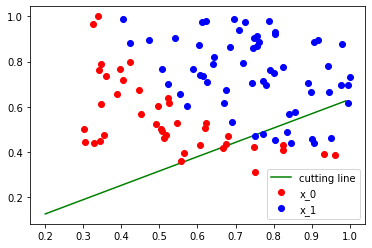

In [19]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
print(type(w0))
b0 = b.data[0].numpy()
plot_x = np.arange(0.2,1,0.01)
plot_y = (-w0*plot_x-b0)/w1
plt.plot(plot_x,plot_y, 'g',label='cutting line')
plt.plot(plot_x0,plot_y0,'ro',label='x_0')
plt.plot(plot_x1,plot_y1,'bo',label='x_1')
plt.legend(loc='best')


In [20]:
def binary_loss(y_pred, y):
    logits = (y*y_pred.clamp(1e-12).log()+(1-y)*(1-y_pred).clamp(1e-12).log()).mean()
    return -logits
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6694, grad_fn=<NegBackward>)


In [21]:
loss.backward()
w.data = w.data - 0.1*w.grad.data
b.data = b.data - 0.1*b.grad.data
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6689, grad_fn=<NegBackward>)


In [22]:
from torch import nn
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))
def logistic_regression(x):
    return torch.sigmoid(torch.mm(x,w)+b)
optimizer = torch.optim.SGD([w,b], lr = 1.0)


In [32]:
import time
start = time.time()
for e in range(1000):
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mask = y_pred.ge(0.5).float()
    acc = (mask==y_data).sum().item()/y_data.shape[0]
    if (e+1)%200 ==0:
        print('epoch:{},Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
    
during = time.time() - start
print()
print('During Time: {:3f} s'.format(during))


epoch:200,Loss: 0.24115, Acc: 0.89000
epoch:400,Loss: 0.23578, Acc: 0.89000
epoch:600,Loss: 0.23150, Acc: 0.89000
epoch:800,Loss: 0.22802, Acc: 0.89000
epoch:1000,Loss: 0.22513, Acc: 0.89000

During Time: 0.458308 s


<class 'numpy.ndarray'>


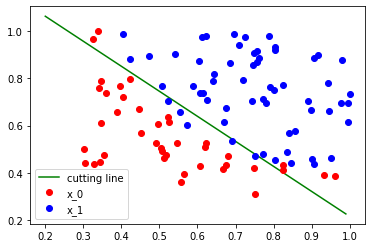

In [33]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
print(type(w0))
b0 = b.data[0].numpy()
plot_x = np.arange(0.2,1,0.01)
plot_y = (-w0*plot_x-b0)/w1
plt.plot(plot_x,plot_y, 'g',label='cutting line')
plt.plot(plot_x0,plot_y0,'ro',label='x_0')
plt.plot(plot_x1,plot_y1,'bo',label='x_1')
plt.legend(loc='best')

In [34]:
from torch import nn
criterion = nn.BCEWithLogitsLoss()
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))
def logistic_reg(x):
    return torch.mm(x,w)+b
optimizer = torch.optim.SGD([w,b], lr = 1.0)


In [35]:
y_pred = logistic_reg(x_data)
loss = criterion(y_pred, y_data)
print(loss.data)

tensor(0.6316)


In [37]:
start = time.time()
for e in range(1000):
    y_pred = logistic_reg(x_data)
    loss = criterion(y_pred,y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mask = y_pred.ge(0.5).float()
    acc = (mask==y_data).sum().item()/y_data.shape[0]
    if (e+1)%200 ==0:
        print('epoch:{},Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
    
during = time.time() - start
print()
print('During Time: {:3f} s'.format(during))

epoch:200,Loss: 0.39401, Acc: 0.88000
epoch:400,Loss: 0.32355, Acc: 0.87000
epoch:600,Loss: 0.29010, Acc: 0.87000
epoch:800,Loss: 0.27043, Acc: 0.87000
epoch:1000,Loss: 0.25741, Acc: 0.88000

During Time: 0.282253 s


<class 'numpy.ndarray'>


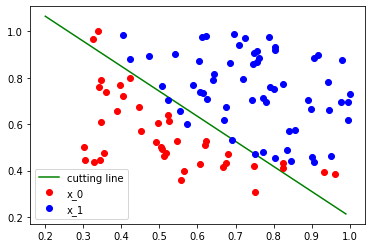

In [38]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
print(type(w0))
b0 = b.data[0].numpy()
plot_x = np.arange(0.2,1,0.01)
plot_y = (-w0*plot_x-b0)/w1
plt.plot(plot_x,plot_y, 'g',label='cutting line')
plt.plot(plot_x0,plot_y0,'ro',label='x_0')
plt.plot(plot_x1,plot_y1,'bo',label='x_1')
plt.legend(loc='best')